## 1. Importing Library and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_excel('dataset.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255 entries, 0 to 2254
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Community      2255 non-null   object 
 1   SiteID         2255 non-null   object 
 2   Site           2255 non-null   object 
 3   Rough          2255 non-null   int64  
 4   Resist         2255 non-null   int64  
 5   Resist_adjust  2255 non-null   float64
 6   Broke          2255 non-null   int64  
 7   Stab           2255 non-null   int64  
 8   Biocrust       2255 non-null   float64
 9   Biocrust_code  2255 non-null   int64  
 10  Erosion        2255 non-null   int64  
 11  Deposit        2255 non-null   int64  
 12  Foliage        2255 non-null   float64
 13  Foliage_code   2255 non-null   int64  
 14  Basal          2255 non-null   float64
 15  Litter%        2255 non-null   float64
 16  Litter_code    2255 non-null   int64  
 17  Litt_depth     2255 non-null   float64
 18  Litt_Ori

In [4]:
df.head()

,Community,SiteID,Site,Rough,Resist,Resist_adjust,Broke,Stab,Biocrust,Biocrust_code,...,Litter_code,Litt_depth,Litt_Origin,Litt_Incorp,Litt_Propn,Litt_Complex,Texture,Stability,Infiltration,Nutrients
0,Cypress pine,CYP_001_000,CYP_001,1,4,1.0,2,4,5.0,2,...,1,3.0,1.5,1.0,95.0,1.5,2,54.107231,20.550760,15.116279
1,Cypress pine,CYP_001_050,CYP_001,1,4,1.0,4,4,20.0,3,...,2,4.0,1.5,1.0,30.0,3.0,2,63.944909,22.605836,20.930233
2,Cypress pine,CYP_001_100,CYP_001,1,4,1.0,4,4,10.0,2,...,2,0.5,1.5,1.0,100.0,3.0,2,63.944909,20.550760,16.279070
3,Cypress pine,CYP_001_150,CYP_001,1,4,1.0,4,3,20.0,3,...,1,0.5,1.5,1.0,100.0,1.5,2,59.026070,16.440608,15.116279
4,Cypress pine,CYP_001_200,CYP_001,1,4,1.0,3,4,30.0,3,...,1,1.0,1.5,1.0,100.0,1.5,2,56.566650,18.495684,15.116279


In [5]:
df.isnull().sum()

Community        0
SiteID           0
Site             0
Rough            0
Resist           0
Resist_adjust    0
Broke            0
Stab             0
Biocrust         0
Biocrust_code    0
Erosion          0
Deposit          0
Foliage          0
Foliage_code     0
Basal            0
Litter%          0
Litter_code      0
Litt_depth       0
Litt_Origin      0
Litt_Incorp      0
Litt_Propn       0
Litt_Complex     0
Texture          0
Stability        0
Infiltration     0
Nutrients        0
dtype: int64

## 2. Splitting Dataset into training and testing set

In [6]:
target = df['Stability']

In [7]:
from sklearn.model_selection import train_test_split

df = df.drop(['SiteID', 'Site'], axis = 1)

target = df['Stability']
features = df.drop('Stability', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size= 0.2, random_state=0)
#stratified : true, split to same ratio of labels


## 3. Using Pipeline and Data Wrangling

In [8]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

numerical_feature = ['Biocrust','Resist_adjust', 'Foliage','Litter%','Litt_depth', 'Litt_Origin','Litt_Incorp','Litt_Propn','Litt_Complex',"Infiltration",'Nutrients']
categorical_feature_onehot = ['Community']

preprocess = FeatureUnion([("std", StandardScaler()), ("pca", PCA())]) # Concatenates results of multiple transformer objects.

numeric_transformer_std = FeatureUnion([("std", StandardScaler()), ("pca", PCA(n_components= 6))]) 
numeric_transformer_norm = FeatureUnion([('scaler', Normalizer()), ('pca', PCA(n_components=6))])
numeric_transformer_minmax = FeatureUnion([('scaler', MinMaxScaler()), ('pca', PCA(n_components=6))])

onehot = OneHotEncoder()
label = LabelEncoder()


preprocessor_std = ColumnTransformer(
    transformers=[
    ('numeric',numeric_transformer_std, numerical_feature),
    ('onehot_feature', onehot, categorical_feature_onehot)
])
preprocessor_norm = ColumnTransformer(
    transformers=[('numeric',numeric_transformer_norm, numerical_feature),
    ('onehot_feature', onehot, categorical_feature_onehot)
])
preprocessor_minmax = ColumnTransformer(
    transformers=[('numeric',numeric_transformer_minmax, numerical_feature),
    ('onehot_feature', onehot, categorical_feature_onehot)
])

## 4. Building Model

- Building Dummy model for baseline

In [9]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score

dummy_regressor = DummyRegressor()
pipeline_std = Pipeline(steps=[('preprocessor', preprocessor_std),
                               ('regressor', dummy_regressor)])
pipeline_minmax = Pipeline(steps=[('preprocessor', preprocessor_minmax),
                               ('regressor', dummy_regressor)])
pipeline_norm = Pipeline(steps=[('preprocessor', preprocessor_norm),
                                ('regressor', dummy_regressor)])



-1.8877542163371374e+30


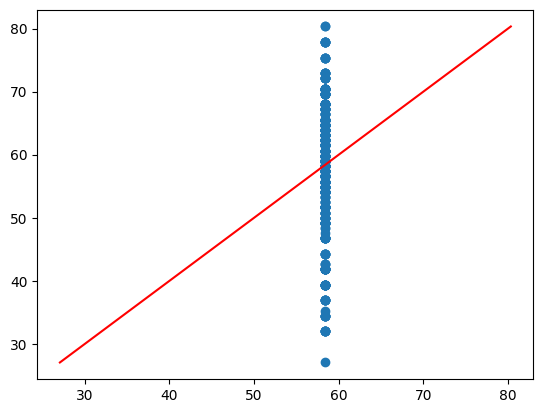

In [10]:
dummy_std = pipeline_std.fit(x_train, y_train)
dummy_std_pred = dummy_std.predict(x_test)
print(r2_score(dummy_std_pred, y_test))
plt.scatter(dummy_std_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

-1.8877542163371374e+30


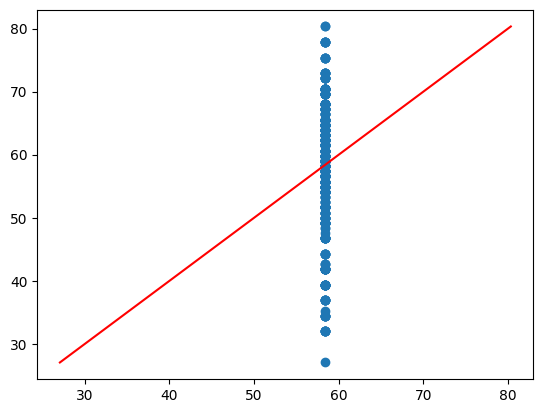

In [11]:
dummy_norm = pipeline_norm.fit(x_train, y_train)
dummy_norm_pred = dummy_norm.predict(x_test)
print(r2_score(dummy_norm_pred, y_test))
plt.scatter(dummy_norm_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

-1.8877542163371374e+30


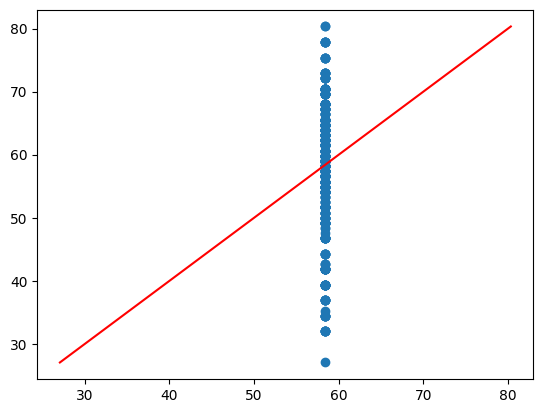

In [12]:
dummy_minmax = pipeline_minmax.fit(x_train, y_train)
dummy_minmax_pred = dummy_minmax.predict(x_test)
print(r2_score(dummy_minmax_pred, y_test))
plt.scatter(dummy_minmax_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

- Linear Regression Model and evaluation

In [13]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
reg_pipeline_std = Pipeline(steps=[('preprocessor', preprocessor_std),
                               ('regressor', regressor)])
reg_pipeline_norm = Pipeline(steps=[('preprocessor', preprocessor_norm),
                               ('regressor', regressor)])
reg_pipeline_minmax = Pipeline(steps=[('preprocessor', preprocessor_minmax),
                               ('regressor', regressor)])

0.7378088005616146


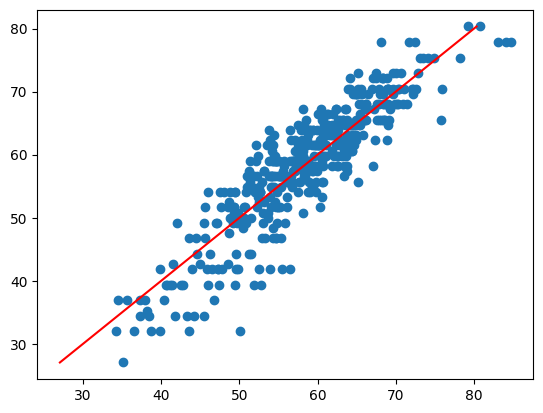

In [14]:
reg_std = reg_pipeline_std.fit(x_train, y_train)
reg_std_pred = reg_std.predict(x_test)
print(r2_score(reg_std_pred, y_test))
plt.scatter(reg_std_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'{mean_squared_error(y_test, reg_std_pred)},{mean_absolute_error(y_test, reg_std_pred)}')

18.789583097709098,3.365379327665927


0.7031139088143785


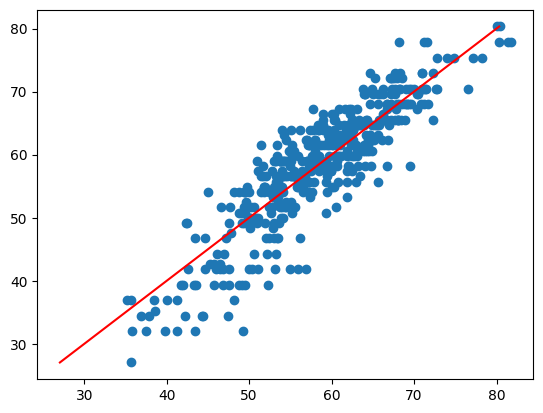

In [16]:
reg_norm = reg_pipeline_norm.fit(x_train, y_train)
reg_norm_pred = reg_norm.predict(x_test)
print(r2_score(reg_norm_pred, y_test))
plt.scatter(reg_norm_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

0.7378088005616109


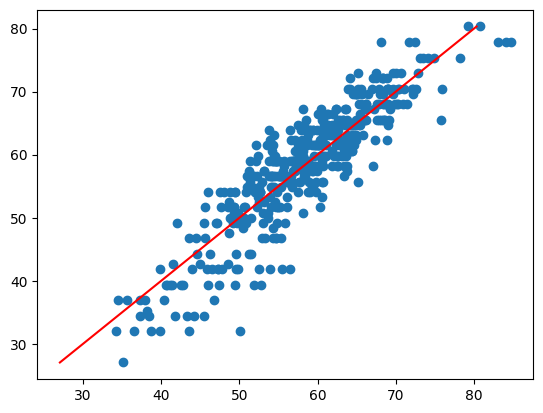

In [17]:
reg_minmax = reg_pipeline_minmax.fit(x_train, y_train)
reg_minmax_pred = reg_minmax.predict(x_test)
print(r2_score(reg_minmax_pred, y_test))
plt.scatter(reg_minmax_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'{mean_squared_error(y_test, reg_minmax_pred)},{mean_absolute_error(y_test, reg_minmax_pred)}')

18.7895830977091,3.36537932766592


In [19]:
from sklearn.model_selection import GridSearchCV

reg_param = {'regressor__fit_intercept' : [True,False]}
reg_gs = GridSearchCV(reg_pipeline_std, param_grid= reg_param, cv=5)
reg_gs_model = reg_gs.fit(x_train,y_train)

In [20]:
reg_gs_pred = reg_gs_model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, reg_gs_pred)

0.8028383599763917

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'{mean_squared_error(y_test, reg_gs_pred)},{mean_absolute_error(y_test, reg_gs_pred)}')

18.789583097709105,3.365379327665924


- Decision Tree model for Regression

In [22]:
from sklearn.tree import DecisionTreeRegressor

regressor_tree = DecisionTreeRegressor(random_state=0)
tree_pipeline_std = Pipeline(steps=[('preprocessor', preprocessor_std),
                               ('regressor', regressor_tree)])
tree_pipeline_norm = Pipeline(steps=[('preprocessor', preprocessor_norm),
                               ('regressor', regressor_tree)])
tree_pipeline_minmax = Pipeline(steps=[('preprocessor', preprocessor_minmax),
                               ('regressor', regressor_tree)])

0.6002149166565501


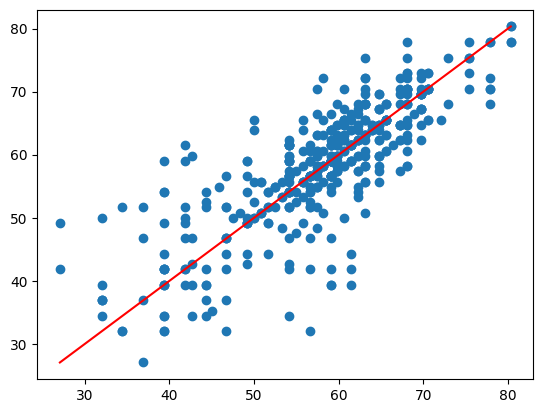

In [23]:
reg_std = tree_pipeline_std.fit(x_train, y_train)
reg_std_pred = reg_std.predict(x_test)
print(r2_score(reg_std_pred, y_test))
plt.scatter(reg_std_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

0.5383657837676806


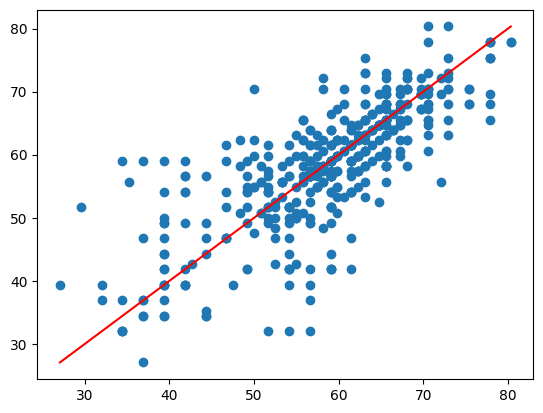

In [24]:
tree_norm = tree_pipeline_norm.fit(x_train, y_train)
tree_norm_pred = tree_norm.predict(x_test)
print(r2_score(tree_norm_pred, y_test))
plt.scatter(tree_norm_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

0.5998553799629406


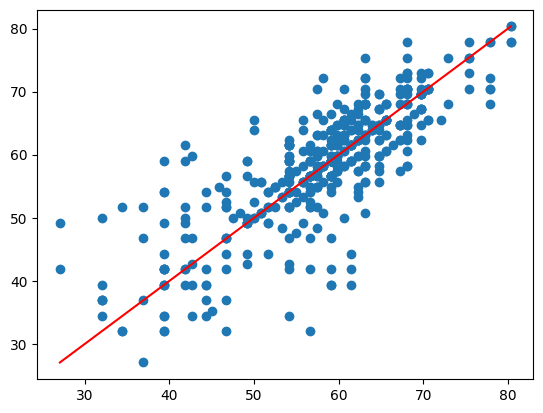

In [25]:
tree_minmax = tree_pipeline_minmax.fit(x_train, y_train)
tree_minmax_pred = tree_minmax.predict(x_test)
print(r2_score(tree_minmax_pred, y_test))
plt.scatter(tree_minmax_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

## Categorical

- Splitting dataset and using pipeline

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict

target_class = df['Texture']
features_class = df.drop('Texture', axis = 1)

a_train, a_test, b_train, b_test = train_test_split(features_class, target_class, test_size= 0.2, random_state=0)

In [27]:
numerical_feature_cat = ['Stability','Biocrust','Resist_adjust', 'Foliage','Litter%','Litt_depth', 'Litt_Origin','Litt_Incorp','Litt_Propn','Litt_Complex',"Infiltration",'Nutrients']
cat_feature = ['Rough','Resist','Broke','Stab','Biocrust_code','Erosion','Deposit','Foliage_code','Basal','Litter_code']

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)

preprocessor_std_cat = ColumnTransformer(
    transformers=[
    ('numeric',numeric_transformer_std, numerical_feature_cat),
    ('lda', lda, cat_feature),
    ('onehot_feature', onehot, categorical_feature_onehot)
])
preprocessor_norm_cat = ColumnTransformer(
    transformers=[('numeric',numeric_transformer_norm, numerical_feature_cat),
                  ('lda', lda, cat_feature),
    ('onehot_feature', onehot, categorical_feature_onehot)
])
preprocessor_minmax_cat = ColumnTransformer(
    transformers=[('numeric',numeric_transformer_minmax, numerical_feature_cat),
                  ('lda', lda, cat_feature),
    ('onehot_feature', onehot, categorical_feature_onehot)
])

- Dummy Classifier model

In [28]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_class = DummyClassifier(strategy='uniform', random_state= 0 )
pipeline_std_cat = Pipeline(steps=[('preprocessor', preprocessor_std_cat),
                               ('classifier', dummy_class)])
pipeline_minmax_cat = Pipeline(steps=[('preprocessor', preprocessor_minmax_cat),
                               ('classifier', dummy_class)])
pipeline_norm_cat = Pipeline(steps=[('preprocessor', preprocessor_norm_cat),
                                ('classifier', dummy_class)])

In [29]:
dummy_std_cat = pipeline_std_cat.fit(a_train, b_train)
dummy_std_pred_cat = dummy_std_cat.predict(a_test)
accuracy_score(b_test, dummy_std_pred_cat)

0.21951219512195122

In [30]:
dummy_norm_cat = pipeline_norm_cat.fit(a_train, b_train)
dummy_norm_pred_cat = dummy_norm_cat.predict(a_test)
accuracy_score(b_test, dummy_norm_pred_cat)

0.21951219512195122

In [31]:
dummy_minmax_cat = pipeline_minmax_cat.fit(a_train, b_train)
dummy_minmax_pred_cat = dummy_minmax_cat.predict(a_test)
accuracy_score(b_test, dummy_minmax_pred_cat)

0.21951219512195122

- Logistic Regression model

In [32]:
from sklearn.linear_model import LogisticRegression 

logistic = LogisticRegression()
log_pipeline_std_cat = Pipeline([('preprocessor', preprocessor_std_cat),
                               ('classifier', logistic)])
log_pipeline_minmax_cat = Pipeline([('preprocessor', preprocessor_minmax_cat),
                               ('classifier', logistic)])
log_pipeline_norm_cat = Pipeline([('preprocessor', preprocessor_norm_cat),
                                ('classifier', logistic)])

In [33]:
log_std_cat = log_pipeline_std_cat.fit(a_train, b_train)
log_std_pred_cat = log_std_cat.predict(a_test)
accuracy_score(b_test, log_std_pred_cat)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9090909090909091

In [34]:
from sklearn.metrics import f1_score

log_norm_cat = log_pipeline_norm_cat.fit(a_train, b_train)
log_norm_pred_cat = log_norm_cat.predict(a_test)
print(accuracy_score(b_test, log_norm_pred_cat), f1_score(b_test, log_norm_pred_cat, average= 'weighted'))

0.9046563192904656 0.9035066499096114


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
log_minmax_cat = log_pipeline_minmax_cat.fit(a_train, b_train)
log_minmax_pred_cat = log_minmax_cat.predict(a_test)
accuracy_score(b_test, log_minmax_pred_cat)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9002217294900222

In [36]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


hyperparameter_log = {'classifier__C': (np.logspace(0,4,10)), 'classifier__penalty' : ['l1','l2']}
gs_log = GridSearchCV(log_minmax_cat, hyperparameter_log, cv= 5, verbose=0, n_jobs= 5)
best_gs_log = gs_log.fit(a_train, b_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMI

In [37]:
gs_log_pred = best_gs_log.predict(a_test)

print(accuracy_score(b_test, gs_log_pred), f1_score(b_test, gs_log_pred, average='weighted'))

0.9046563192904656 0.9044965255111468


- Decision Tree Classifier Model

In [38]:
from sklearn.tree import DecisionTreeClassifier
class_tree = DecisionTreeClassifier()

tree_pipeline_std_cat = Pipeline([('preprocessor', preprocessor_std_cat),
                               ('classifier', class_tree)])
tree_pipeline_minmax_cat = Pipeline([('preprocessor', preprocessor_minmax_cat),
                               ('classifier', class_tree)])
tree_pipeline_norm_cat = Pipeline([('preprocessor', preprocessor_norm_cat),
                                ('classifier', class_tree)])

In [39]:
tree_std_cat = tree_pipeline_std_cat.fit(a_train, b_train)
tree_std_pred_cat = tree_std_cat.predict(a_test)
print(accuracy_score(b_test, tree_std_pred_cat), f1_score(b_test, tree_std_pred_cat, average='weighted'))

0.8580931263858093 0.8580883911546555


In [40]:
tree_norm_cat = tree_pipeline_norm_cat.fit(a_train, b_train)
tree_norm_pred_cat = tree_norm_cat.predict(a_test)
print(accuracy_score(b_test, tree_norm_pred_cat), f1_score(b_test, tree_norm_pred_cat, average='weighted'))

0.88470066518847 0.8849920982580114


In [41]:
tree_minmax_cat = tree_pipeline_minmax_cat.fit(a_train, b_train)
tree_minmax_pred_cat = tree_minmax_cat.predict(a_test)
accuracy_score(b_test, tree_minmax_pred_cat)

0.8713968957871396

In [42]:
matrix= confusion_matrix(b_test, tree_std_pred_cat)
print(matrix)

[[291  13   1   2]
 [ 19  89   2  12]
 [  0   1   0   0]
 [  6   8   0   7]]


In [43]:
from sklearn.model_selection import GridSearchCV

hyperparameter_tree_cat = {'classifier__max_depth' : [50,100,200,500,750,None],
                           'classifier__min_samples_split': [100,200,400,500,800,1000,None],
                           'classifier__min_samples_leaf': [50,100,200,500,750,None],
                           'classifier__criterion':['gini','entropy']}

gs_tree_cat = GridSearchCV(tree_pipeline_minmax_cat, hyperparameter_tree_cat, cv=5, verbose=0,n_jobs=5)
gs_tree_cat_best = gs_tree_cat.fit(a_train, b_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
720 fits failed out of a total of 2520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
 

In [44]:
gs_tree_cat_best_pred = gs_tree_cat_best.predict(a_test)
accuracy_score(b_test, gs_tree_cat_best_pred)

0.8957871396895787

In [45]:
from sklearn.model_selection import RandomizedSearchCV

rscv_tree_cat = RandomizedSearchCV(tree_pipeline_minmax_cat, hyperparameter_tree_cat, random_state=0, n_iter=100, cv = 5, verbose=0, n_jobs = 5)
rscv_tree_cat_best = rscv_tree_cat.fit(a_train, b_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
115 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  F

In [46]:
rscv_tree_cat_best_pred = rscv_tree_cat_best.predict(a_test)

from sklearn.metrics import f1_score
print(accuracy_score(b_test, rscv_tree_cat_best_pred), f1_score(b_test, rscv_tree_cat_best_pred, average='weighted'))

0.8957871396895787 0.8786363023822643


In [49]:
result_df = pd.DataFrame({'Numerical Predicted' : reg_gs_pred, 'True Numerical': y_test, 
                          'Categorical Predicted' : tree_std_pred_cat, 'True Categorical' : b_test})

result_df.to_csv('results.csv', index=False)